In [12]:
## 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [13]:
from google.colab import files
uploaded = files.upload()

Saving plant_disease_dataset.csv to plant_disease_dataset (2).csv


In [14]:
## 2. LOAD CLEAN DATA
# Load your Pasicaran plant disease dataset
df = pd.read_csv('plant_disease_dataset.csv')  # Upload your file first
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head(10)


Dataset shape: (10000, 5)

First 5 rows:


,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0
5,23.829315,32.289578,2.058564,5.727685,0
6,32.896064,50.008205,0.315200,7.843564,0
7,28.837174,32.183279,19.999401,7.880548,0
8,22.652628,31.523728,5.047287,5.047016,0
9,27.712800,48.185946,3.063416,4.426779,0


In [15]:
## 3. DATA EXPLORATION & PREPARATION
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Target distribution
print("\nDisease Distribution:")
print(df['disease_present'].value_counts(normalize=True))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      10000 non-null  float64
 1   humidity         10000 non-null  float64
 2   rainfall         10000 non-null  float64
 3   soil_pH          10000 non-null  float64
 4   disease_present  10000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 390.8 KB
None

Dataset Description:
        temperature      humidity      rainfall       soil_pH  disease_present
count  10000.000000  10000.000000  10000.000000  10000.000000     10000.000000
mean      25.612191     62.119300      9.807522      6.245855         0.241000
std        5.813841     22.679977      9.852130      1.302465         0.427712
min        5.387999      6.244209      0.000055      4.000075         0.000000
25%       21.815610     40.772925      2.812822      5.122970         0.000000
50% 

In [17]:
## 4. SELECT FEATURES & PREPARE TARGET
# Features (environmental factors)
features = ['temperature', 'humidity', 'rainfall', 'soil_pH']
X = df[features].copy()

# Target (binary: 0=no disease, 1=disease)
y = df['disease_present'].copy()

print("Features selected:", features)
print("Target distribution:\n", pd.Series(y).value_counts())

Features selected: ['temperature', 'humidity', 'rainfall', 'soil_pH']
Target distribution:
 disease_present
0    7590
1    2410
Name: count, dtype: int64


In [18]:
## 5. HANDLE MISSING VALUES (if any)
# Check for missing values
print("Missing values before imputation:")
print(X.isnull().sum())

# Impute with median (robust to outliers)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

print("\nMissing values after imputation: 0")
print("X shape:", X_imputed.shape)


Missing values before imputation:
temperature    0
humidity       0
rainfall       0
soil_pH        0
dtype: int64

Missing values after imputation: 0
X shape: (10000, 4)


In [19]:
## 6. TRAIN-TEST SPLIT (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=123, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Train class distribution:\n{pd.Series(y_train).value_counts()}")


Training set: 8000 samples
Test set: 2000 samples
Train class distribution:
disease_present
0    6072
1    1928
Name: count, dtype: int64


In [20]:
## 7. FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled (StandardScaler)")
print("X_train_scaled shape:", X_train_scaled.shape)


✅ Features scaled (StandardScaler)
X_train_scaled shape: (8000, 4)


In [21]:
## 8. BUILD & TRAIN LOGISTIC REGRESSION MODEL
logreg = LogisticRegression(random_state=123, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

print("✅ Model trained successfully!")
logreg


✅ Model trained successfully!


LogisticRegression(max_iter=1000, random_state=123)

In [22]:
## 9. MODEL EVALUATION
# Predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))


Confusion Matrix:
[[1476   42]
 [ 430   52]]

Accuracy: 0.7640

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.77      0.97      0.86      1518
     Disease       0.55      0.11      0.18       482

    accuracy                           0.76      2000
   macro avg       0.66      0.54      0.52      2000
weighted avg       0.72      0.76      0.70      2000



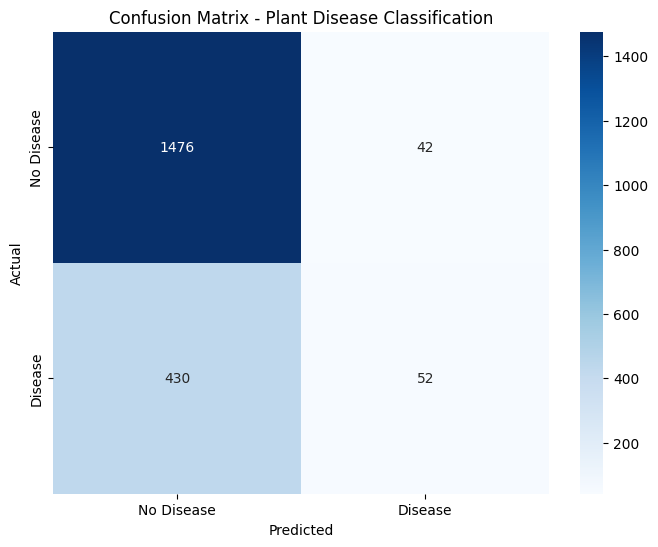

In [23]:
## 10. VISUALIZATIONS
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Plant Disease Classification')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


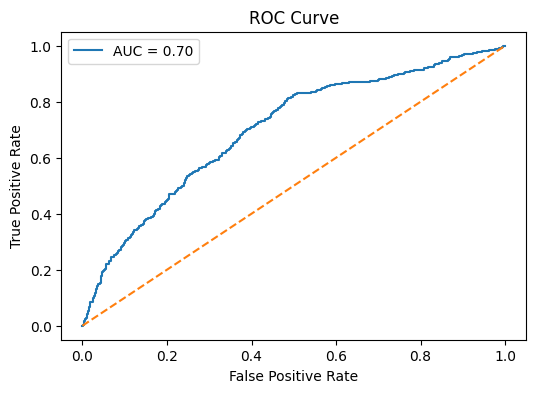

In [25]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

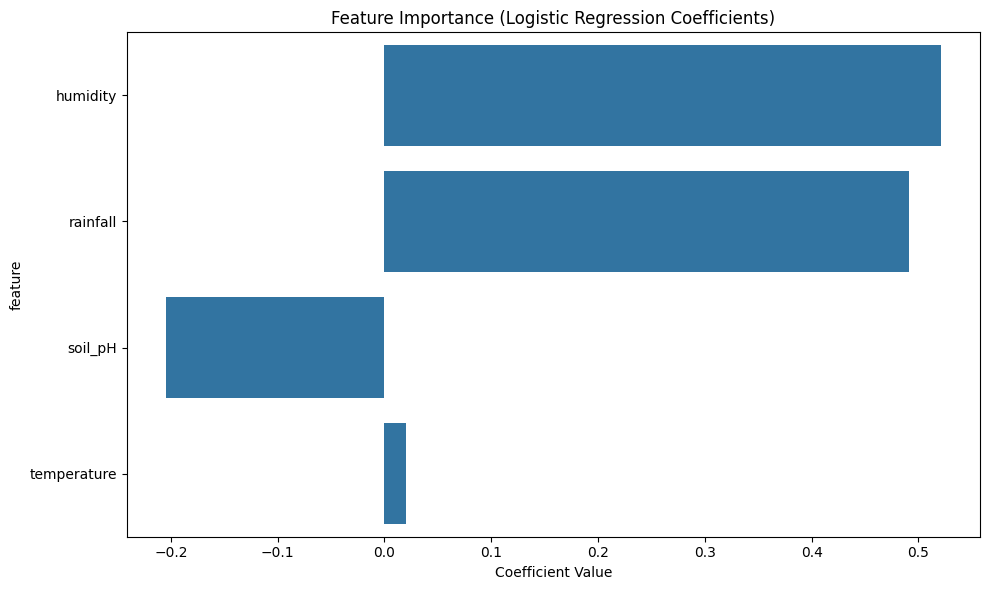

Feature Importance:
       feature  coefficient
1     humidity     0.521399
2     rainfall     0.491547
3      soil_pH    -0.205049
0  temperature     0.019739


In [26]:
## 11. FEATURE IMPORTANCE
feature_importance = pd.DataFrame({
    'feature': features,
    'coefficient': logreg.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='coefficient', y='feature')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

print("Feature Importance:")
print(feature_importance)


In [27]:
## 12. INSIGHTS & RECOMMENDATIONS

print("📊 KEY INSIGHTS:")
print("1. Model Performance:", f"{accuracy*100:.1f}% accuracy")
print("2. Class Balance:", f"{y.mean()*100:.1f}% disease cases (imbalanced)")
print("3. Top Predictors:")
for i, row in feature_importance.head().iterrows():
    print(f"   - {row['feature']}: {row['coefficient']:.3f}")

print("\n🚀 IMPROVEMENT SUGGESTIONS:")
print("- Use class_weight='balanced' for better minority class performance")
print("- Try Random Forest or XGBoost for potentially better accuracy")
print("- Apply SMOTE for oversampling minority class")
print("- Add interaction terms between humidity*rainfall")


📊 KEY INSIGHTS:
1. Model Performance: 76.4% accuracy
2. Class Balance: 24.1% disease cases (imbalanced)
3. Top Predictors:
   - humidity: 0.521
   - rainfall: 0.492
   - soil_pH: -0.205
   - temperature: 0.020

🚀 IMPROVEMENT SUGGESTIONS:
- Use class_weight='balanced' for better minority class performance
- Try Random Forest or XGBoost for potentially better accuracy
- Apply SMOTE for oversampling minority class
- Add interaction terms between humidity*rainfall
